## Importing libs

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 
from matplotlib.lines import Line2D

## Importing ang exploring data

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("ml_project1_data.csv")

In [4]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%   

All values of Z_CostContact and Z_Revenue are 3 or 11 respectively, so we'll drop these columns

In [5]:
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

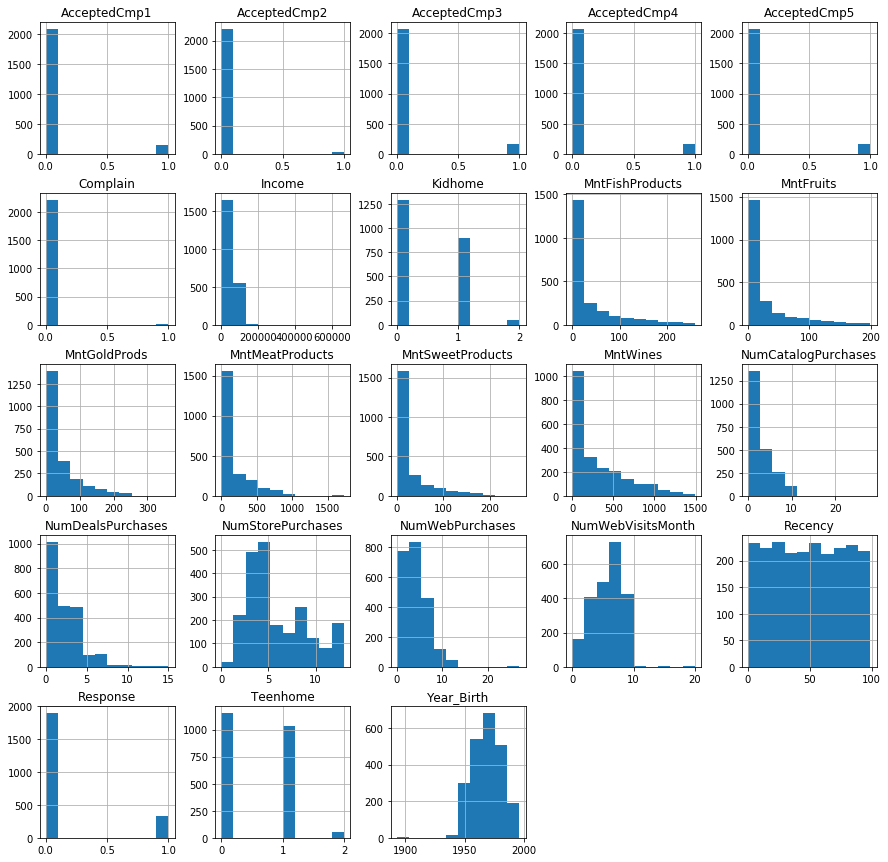

In [6]:
_ = df.drop(columns=['ID']).hist(figsize=(15,15))

__Considering that Campaign__ 2 seems to have been much worse than the other campaings, it would be probably better to not rely on this column.  

In [7]:
campaigns = ['AcceptedCmp' + str(i) for i in range(1,6)]
campaigns

['AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5']

In [8]:
for i,x in enumerate(campaigns): 
    print('campaign ' + str(i+1) + ' had ' + str(df[x].mean()*100) + ' % of acceptance')

campaign 1 had 6.428571428571428 % of acceptance
campaign 2 had 1.3392857142857142 % of acceptance
campaign 3 had 7.276785714285714 % of acceptance
campaign 4 had 7.455357142857142 % of acceptance
campaign 5 had 7.276785714285714 % of acceptance


### Age distribution

In [9]:
(df['Year_Birth']>1980).mean()

0.171875

In [10]:
df[df['Year_Birth']>1990]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
46     9909        1996    2n Cycle        Married   7500.0        0   
111    7431        1991         PhD         Single  68126.0        0   
113     999        1991  Graduation         Single  86037.0        0   
140     821        1992      Master         Single  92859.0        0   
309    1379        1992      Master       Together  42670.0        0   
392    2669        1993  Graduation         Single  74293.0        0   
395    3428        1991         PhD       Together  68682.0        0   
417    5067        1994  Graduation       Together  80134.0        0   
508    3386        1992  Graduation        Married  34935.0        0   
522    9214        1991  Graduation        Married  42691.0        0   
696    8315        1995  Graduation         Single  34824.0        0   
729   11101        1991  Graduation       Together  89891.0        0   
747   10548        1995  Graduation         Single  71163.0        0   
831    8560        1992  Graduation         Single  48789.0        0   
846   10343        1991    2n Cycle         Single  61618.0        0   
893    9960        1991       Basic         Single  26868.0        1   
911    4654        1992  Graduation       Together  75114.0        0   
914   10619        1994  Graduation         Single  95529.0        0   
921    4483        1993  Graduation         Single  72354.0        0   
928   10037        1993  Graduation         Single  74293.0        0   
995    5184        1995  Graduation         Single  34824.0        0   
1042  10749        1991  Graduation         Single   8028.0        0   
1066   3005        1992  Graduation         Single  83528.0        0   
1163   6905        1994  Graduation       Together  80685.0        0   
1170    193        1996       Basic        Married  14421.0        0   
1179   5735        1991      Master         Single  90638.0        0   
1218   4500        1991         PhD       Together  68682.0        0   
1246   4136        1992       Basic         Single   7500.0        1   
1351   5080        1993  Graduation         Single  70515.0        0   
1361   1384        1992       Basic        Married  17256.0        1   
1572   5350        1991      Master         Single  90638.0        0   
1578   8175        1992  Graduation        Married  34935.0        0   
1675   4712        1991    2n Cycle       Together  20193.0        0   
1714   4055        1992       Basic         Single  18746.0        1   
1722    569        1991  Graduation         Single  90273.0        0   
1813  10513        1992  Graduation       Together  63207.0        0   
1850   4427        1995    2n Cycle         Single  83257.0        0   
1987   4552        1991  Graduation        Married  51373.0        0   
2040   5631        1991  Graduation         Single  49767.0        0   
2086   2802        1992    2n Cycle        Married  87000.0        0   
2093   7734        1993  Graduation         Absurd  79244.0        0   
2164   7600        1992       Basic         Single  15253.0        1   
2213   3661        1995    2n Cycle         Single  80617.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
46           0  2012-11-09       24         3         18               14   
111          0  2012-11-10       40      1332         17              311   
113          0  2013-01-02       95       490         44              125   
140          0  2012-10-19       46       962         61              921   
309          0  2013-04-27       12       154          2               46   
392          0  2014-05-04       66       375        152              335   
395          0  2013-10-06       56       919          0              505   
417          0  2014-02-14       11       966         26              282   
508          0  2013-06-21       71        34          4               66   
522          0  2013-08-16       48       179          2              

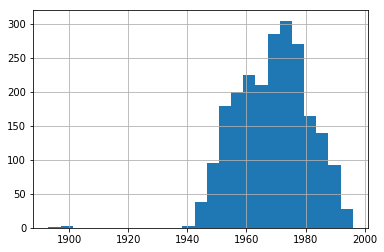

In [11]:
df['Year_Birth'].hist(bins=25)

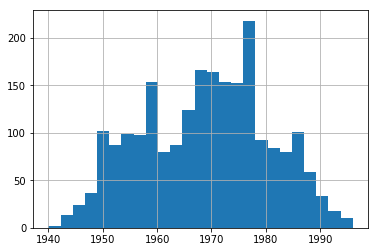

In [12]:
df[df['Year_Birth']>1930]['Year_Birth'].hist(bins=25)

In [13]:
df['Income_Month'] = df['Income']/12

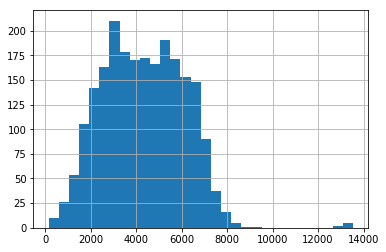

In [14]:
df[df['Income_Month']<20000]['Income_Month'].hist(bins=30)

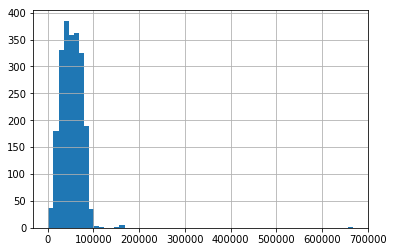

In [15]:
df['Income'].hist(bins=60)

## Structuring 

All ids are filled

In [16]:
df['ID'].count()

2240

We have 98.92% of respondents for Income

In [17]:
df['Income'].notna().mean()

0.9892857142857143

It means that we have 1.07% of non-respondents 

In [18]:
df['Income'].isna().sum()

24

Are these ones who didn't inform their Income from a certain age? No. 

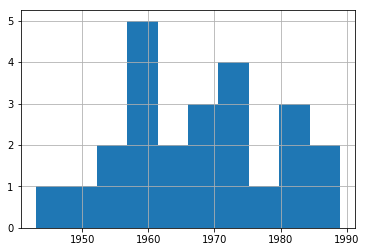

In [19]:
df[df['Income'].isna()]['Year_Birth'].hist()

Lets take a look at the columns. Are they filled well?

In [20]:
columns = df.columns

In [21]:
df.apply(lambda x: sum(x.isnull()), axis=0)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Income_Month           24
dtype: int64

That's good. Just the column Income has missing values. 

In [22]:
df.shape

(2240, 28)

In [23]:
df.head(30)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   5524        1957  Graduation         Single  58138.0        0         0   
1   2174        1954  Graduation         Single  46344.0        1         1   
2   4141        1965  Graduation       Together  71613.0        0         0   
3   6182        1984  Graduation       Together  26646.0        1         0   
4   5324        1981         PhD        Married  58293.0        1         0   
5   7446        1967      Master       Together  62513.0        0         1   
6    965        1971  Graduation       Divorced  55635.0        0         1   
7   6177        1985         PhD        Married  33454.0        1         0   
8   4855        1974         PhD       Together  30351.0        1         0   
9   5899        1950         PhD       Together   5648.0        1         1   
10  1994        1983  Graduation        Married      NaN        1         0   
11   387        1976       Basic        Married   7500.0        0         0   
12  2125        1959  Graduation       Divorced  63033.0        0         0   
13  8180        1952      Master       Divorced  59354.0        1         1   
14  2569        1987  Graduation        Married  17323.0        0         0   
15  2114        1946         PhD         Single  82800.0        0         0   
16  9736        1980  Graduation        Married  41850.0        1         1   
17  4939        1946  Graduation       Together  37760.0        0         0   
18  6565        1949      Master        Married  76995.0        0         1   
19  2278        1985    2n Cycle         Single  33812.0        1         0   
20  9360        1982  Graduation        Married  37040.0        0         0   
21  5376        1979  Graduation        Married   2447.0        1         0   
22  1993        1949         PhD        Married  58607.0        0         1   
23  4047        1954         PhD        Married  65324.0        0         1   
24  1409        1951  Graduation       Together  40689.0        0         1   
25  7892        1969  Graduation         Single  18589.0        0         0   
26  2404        1976  Graduation        Married  53359.0        1         1   
27  5255        1986  Graduation         Single      NaN        1         0   
28  9422        1989  Graduation        Married  38360.0        1         0   
29  1966        1965         PhD        Married  84618.0        0         0   

   Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0   2012-09-04       58       635         88              546   
1   2014-03-08       38        11          1                6   
2   2013-08-21       26       426         49              127   
3   2014-02-10       26        11          4               20   
4   2014-01-19       94       173         43              118   
5   2013-09-09       16       520         42               98   
6   2012-11-13       34       235         65              164   
7   2013-05-08       32        76         10               56   
8   2013-06-06       19        14          0               24   
9   2014-03-13       68        28          0                6   
10  2013-11-15       11         5          5                6   
11  2012-11-13       59         6         16               11   
12  2013-11-15       82       194         61              480   
13  2013-11-15       53       233          2               53   
14  2012-10-10       38         3         14               17   
15  2012-11-24       23      1006         22              115   
16  2012-12-24       51        53          5               19   
17  2012-08-31       20        84          5               38   
18  2013-03-28       91      1012         80              498   
19  2012-11-03       86         4         17               19   
20  2012-08-08       41        86          2               73   
21  2013-01-06       42         1          1             1725   
22  2012-12-23       63       867          0               86

In [24]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Income_Month           float64
dtype: object

In [25]:
df.drop(columns=['ID','Income_Month'], inplace=True)

In [26]:
df.dropna(inplace=True)

In [27]:
df_copy = df.copy()

As we have __categorical__ variables we'll turn them into dummy variables

In [28]:
df.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
dtype: object

They're Education and Marital Status

In [29]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [30]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

We can see we have a small problem of input so I'll fill all Alone, Absurd and YOLO as single. 

In [31]:
df.loc[df['Marital_Status'].isin(['Alone','Absurd','YOLO']), 'Marital_Status']  = 'Single'

In [32]:
cat_columns = ['Education', 'Marital_Status']
for i in cat_columns:
    dummy = pd.get_dummies(df[i])
    df = pd.concat([df,dummy], axis=1)
df.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

   2n Cycle  Basic  Graduation  Master  PhD  Divorced  Married  Single  \
0         0      0           1       0    0         0        0       1   
1         0      0           1       0    0         0        0       1   
2         0      0           1       0    0         0        0       0   
3         0      0           1       0    0         0        0       0   
4         0      0           0       0    1         0        1       0   

   Together  Widow  
0         0      0  
1         0      0  
2         1      0  
3         1      0  
4         0      0

In [33]:
df.drop(columns=['Marital_Status','Education'], inplace=True)

# Exploring

In [34]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

- Fish is more positively correlated with fruits (0.5948) than with wine (0.3998)
- Parents having children or teenagers at home tend to spend less money in general but they also tend to purchase more using deals and to visit the website
- Catalog seems like the channel where people use to spend more money in general
- People who buy wine tend to accept more the campaigns
- The number of web visits per month is negativelly correlated with the money spent by the custumer, as well as the custumer income

# Clustering

Using the elbow method to find the optimum number of clusters

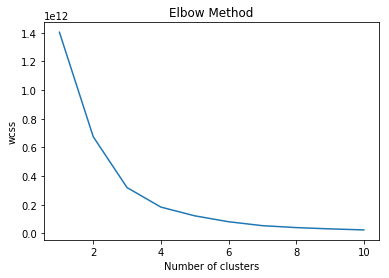

In [35]:
wcss = []
X = df.drop(axis=0, columns=['Dt_Customer']).dropna()
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

Let's go with 4 clusters

In [36]:
##Fitting kmeans to the dataset with k=4
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

In [37]:
X

Year_Birth    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0           1957   58138.0        0         0       58       635         88   
1           1954   46344.0        1         1       38        11          1   
2           1965   71613.0        0         0       26       426         49   
3           1984   26646.0        1         0       26        11          4   
4           1981   58293.0        1         0       94       173         43   
5           1967   62513.0        0         1       16       520         42   
6           1971   55635.0        0         1       34       235         65   
7           1985   33454.0        1         0       32        76         10   
8           1974   30351.0        1         0       19        14          0   
9           1950    5648.0        1         1       68        28          0   
11          1976    7500.0        0         0       59         6         16   
12          1959   63033.0        0         0       82       194         61   
13          1952   59354.0        1         1       53       233          2   
14          1987   17323.0        0         0       38         3         14   
15          1946   82800.0        0         0       23      1006         22   
16          1980   41850.0        1         1       51        53          5   
17          1946   37760.0        0         0       20        84          5   
18          1949   76995.0        0         1       91      1012         80   
19          1985   33812.0        1         0       86         4         17   
20          1982   37040.0        0         0       41        86          2   
21          1979    2447.0        1         0       42         1          1   
22          1949   58607.0        0         1       63       867          0   
23          1954   65324.0        0         1        0       384          0   
24          1951   40689.0        0         1       69       270          3   
25          1969   18589.0        0         0       89         6          4   
26          1976   53359.0        1         1        4       173          4   
28          1989   38360.0        1         0       26        36          2   
29          1965   84618.0        0         0       96       684        100   
30          1989   10979.0        0         0       34         8          4   
31          1963   38620.0        0         0       56       112         17   
...          ...       ...      ...       ...      ...       ...        ...   
2209        1963   45146.0        1         1       28        33          0   
2210        1955   41769.0        0         1       31       302         29   
2211        1981   88325.0        0         0       42       519         71   
2212        1950   38054.0        1         1       24        23          2   
2213        1995   80617.0        0         0       42       594         51   
2214        1976    5305.0        0         1       12        12          4   
2215        1954   36807.0        1         1       88         4          2   
2216        1983   28427.0        1         0       67        18          3   
2217        1948   82032.0        0         0       54       332        194   
2218        1978   22775.0        1         0       40         5          1   
2219        1985   40101.0        1         0       73       171          3   
2220        1979   58025.0        0         1       81       270         31   
2221        1982   75777.0        0         0       12       712         26   
2222        1979    7500.0        1         0        7         2          8   
2223        1963   33562.0        1         2       33        21         12   
2224        1970   57642.0        0         1       24       580          6   
2225        1968   58554.0        1         1       55       368         24   
2226        1979   63777.0        1         1       87       457          5   
2227        1962   57967.0        0         1       39  

In [38]:
X.shape

(2216, 33)

In [39]:
y_means.shape

(2216,)

In [40]:
X = X.as_matrix(columns=X.columns)

/Users/ianca/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



(array([743.,   0.,   0., 785.,   0.,   0., 687.,   0.,   0.,   1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

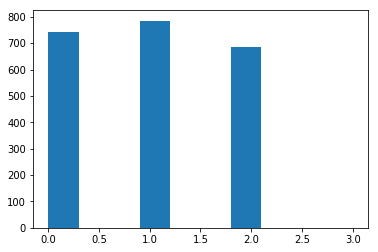

In [41]:
plt.hist(y_means, bins=10)

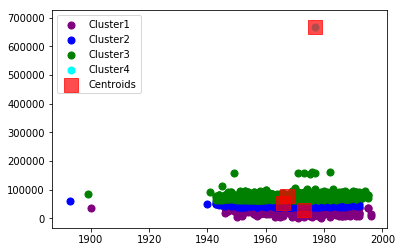

In [42]:
#Visualizing the clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')

plt.legend()

A scatter plot doesn't solve our visualization problem. Let's go with a biplot and a coordinate plot. 

Also, there is an outlier over there. Let's identify who is it!

In [43]:
X_df = X = df.drop(axis=0, columns=['Dt_Customer']).dropna()

In [44]:
X_df.head()

Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0        1957  58138.0        0         0       58       635         88   
1        1954  46344.0        1         1       38        11          1   
2        1965  71613.0        0         0       26       426         49   
3        1984  26646.0        1         0       26        11          4   
4        1981  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   
3               20               10                 3             5   
4              118               46                27            15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  2n Cycle  Basic  Graduation  Master  PhD  \
0             0         0         1         0      0           1       0    0   
1             0         0         0         0      0           1       0    0   
2             0         0         0         0      0           1       0    0   
3             0         0         0         0      0           1       0    0   
4             0         0         0         0      0           0       0    1   

   Divorced  Married  Single  Together  Widow  
0         0        0       1         0      0  
1         0        0       1         0      0  
2         0        0       0         1      0  
3         0        0       0         1      0  
4         0        1       0         0      0

In [45]:
y_means_df = pd.DataFrame({'k': y_means})

In [46]:
X_cluster = pd.concat([X_df,y_means_df],axis=1)

In [47]:
X_cluster.k.value_counts()

1.0    785
0.0    743
2.0    687
3.0      1
Name: k, dtype: int64

In [48]:
X_cluster[X_cluster.k==3.0]

Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
2209      1963.0  45146.0      1.0       1.0     28.0      33.0        0.0   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
2209              5.0              0.0               0.0          15.0   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
2209                2.0              1.0                  1.0   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
2209                2.0                4.0           0.0           0.0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  2n Cycle  \
2209           0.0           0.0           0.0       0.0       0.0       0.0   

      Basic  Graduation  Master  PhD  Divorced  Married  Single  Together  \
2209    0.0         1.0     0.0  0.0       1.0      0.0     0.0       0.0   

      Widow    k  
2209    0.0  3.0

Who are you, outlier??

In [49]:
X_cluster.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', '2n Cycle', 'Basic',
       'Graduation', 'Master', 'PhD', 'Divorced', 'Married', 'Single',
       'Together', 'Widow', 'k'],
      dtype='object')

In [50]:
fig = px.parallel_coordinates(X_cluster, color="k")
fig.show(figsize=(30,30))

Let's go with 5 clusters

In [51]:
##Fitting kmeans to the dataset with k=4
km5=KMeans(n_clusters=5,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km5.fit_predict(X)

In [52]:
y_means_df = pd.DataFrame({'k': y_means})

In [53]:
X_cluster = pd.concat([X_df,y_means_df],axis=1)

In [54]:
fig = px.parallel_coordinates(X_cluster[X_cluster.k==0.0], color="k")
fig.show(figsize=(30,30))

In [55]:
fig = px.parallel_coordinates(X_cluster[X_cluster.k==1.0], color="k")
fig.show(figsize=(30,30))

In [56]:
X_cluster.k.value_counts()

0.0    677
3.0    672
4.0    460
2.0    406
1.0      1
Name: k, dtype: int64

In [57]:
fig = px.parallel_coordinates(X_cluster[X_cluster.k==2.0], color="k")
fig.show(figsize=(30,30))

In [58]:
fig = px.parallel_coordinates(X_cluster[X_cluster.k==3.0], color="k")
fig.show(figsize=(30,30))

We have so many features here, including binary ones. We will run k-means using just the scalar features.

Let's go with 4 clusters

In [59]:
df.dtypes

Year_Birth               int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
2n Cycle                 uint8
Basic                    uint8
Graduation               uint8
Master                   uint8
PhD                      uint8
Divorced                 uint8
Married                  uint8
Single                   uint8
Together

In [60]:
df.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', '2n Cycle',
       'Basic', 'Graduation', 'Master', 'PhD', 'Divorced', 'Married', 'Single',
       'Together', 'Widow'],
      dtype='object')

In [61]:
df_km = df.drop(columns=['Response','Kidhome', 'Teenhome','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', '2n Cycle',
       'Basic', 'Graduation', 'Master', 'PhD', 'Divorced',
       'Married', 'Single', 'Together', 'Widow'])

In [62]:
df_km

Year_Birth    Income Dt_Customer  Recency  MntWines  MntFruits  \
0           1957   58138.0  2012-09-04       58       635         88   
1           1954   46344.0  2014-03-08       38        11          1   
2           1965   71613.0  2013-08-21       26       426         49   
3           1984   26646.0  2014-02-10       26        11          4   
4           1981   58293.0  2014-01-19       94       173         43   
5           1967   62513.0  2013-09-09       16       520         42   
6           1971   55635.0  2012-11-13       34       235         65   
7           1985   33454.0  2013-05-08       32        76         10   
8           1974   30351.0  2013-06-06       19        14          0   
9           1950    5648.0  2014-03-13       68        28          0   
11          1976    7500.0  2012-11-13       59         6         16   
12          1959   63033.0  2013-11-15       82       194         61   
13          1952   59354.0  2013-11-15       53       233          2   
14          1987   17323.0  2012-10-10       38         3         14   
15          1946   82800.0  2012-11-24       23      1006         22   
16          1980   41850.0  2012-12-24       51        53          5   
17          1946   37760.0  2012-08-31       20        84          5   
18          1949   76995.0  2013-03-28       91      1012         80   
19          1985   33812.0  2012-11-03       86         4         17   
20          1982   37040.0  2012-08-08       41        86          2   
21          1979    2447.0  2013-01-06       42         1          1   
22          1949   58607.0  2012-12-23       63       867          0   
23          1954   65324.0  2014-01-11        0       384          0   
24          1951   40689.0  2013-03-18       69       270          3   
25          1969   18589.0  2013-01-02       89         6          4   
26          1976   53359.0  2013-05-27        4       173          4   
28          1989   38360.0  2013-05-31       26        36          2   
29          1965   84618.0  2013-11-22       96       684        100   
30          1989   10979.0  2014-05-22       34         8          4   
31          1963   38620.0  2013-05-11       56       112         17   
...          ...       ...         ...      ...       ...        ...   
2209        1963   45146.0  2013-07-15       28        33          0   
2210        1955   41769.0  2013-02-13       31       302         29   
2211        1981   88325.0  2014-02-05       42       519         71   
2212        1950   38054.0  2014-05-01       24        23          2   
2213        1995   80617.0  2012-10-12       42       594         51   
2214        1976    5305.0  2013-07-30       12        12          4   
2215        1954   36807.0  2012-12-20       88         4          2   
2216        1983   28427.0  2013-03-21       67        18          3   
2217        1948   82032.0  2014-04-05       54       332        194   
2218        1978   22775.0  2013-06-19       40         5          1   
2219        1985   40101.0  2012-10-14       73       171          3   
2220        1979   58025.0  2013-11-26       81       270         31   
2221        1982   75777.0  2013-07-04       12       712         26   
2222        1979    7500.0  2013-05-07        7         2          8   
2223        1963   33562.0  2014-06-25       33        21         12   
2224        1970   57642.0  2014-01-09       24       580          6   
2225        1968   58554.0  2012-09-26       55       368         24   
2226        1979   63777.0  2013-03-24       87       457          5   
2227        1962   57967.0  2013-03-03       39       229          7   
2229        1972   24434.0  2014-05-18        9         3          2   
2230        1984   11012.0  2013-03-16       82        24          3   
2231        1970   44802.0  2012-08-21       71       853         10   
2232        1986   26816.0  2012-08-17       50         5          1   
2233        1977  666666.0  2013-06-02       2

In [63]:
df_km['Year_Custumer'] = pd.to_datetime(df_km['Dt_Customer'], yearfirst=True).dt.year

In [64]:
df_km.head()

Year_Birth   Income Dt_Customer  Recency  MntWines  MntFruits  \
0        1957  58138.0  2012-09-04       58       635         88   
1        1954  46344.0  2014-03-08       38        11          1   
2        1965  71613.0  2013-08-21       26       426         49   
3        1984  26646.0  2014-02-10       26        11          4   
4        1981  58293.0  2014-01-19       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   
3               20               10                 3             5   
4              118               46                27            15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  Year_Custumer  
0                  7           2012  
1                  5           2014  
2                  4           2013  
3                  6           2014  
4                  5           2014

In [65]:
df_km.drop(columns=['Dt_Customer'], inplace=True)

In [66]:
df_km.head()

Year_Birth   Income  Recency  MntWines  MntFruits  MntMeatProducts  \
0        1957  58138.0       58       635         88              546   
1        1954  46344.0       38        11          1                6   
2        1965  71613.0       26       426         49              127   
3        1984  26646.0       26        11          4               20   
4        1981  58293.0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   
3               10                 3             5                  2   
4               46                27            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   Year_Custumer  
0           2012  
1           2014  
2           2013  
3           2014  
4           2014

### Preprocessing

In [67]:
scaler = StandardScaler()
X_std = scaler.fit_transform(df_km)

/Users/ianca/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/Users/ianca/miniconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [68]:
X_std

array([[-0.98644293,  0.2340627 ,  0.31053212, ..., -0.55414289,
         0.69323197, -1.50034282],
       [-1.23680074, -0.23455948, -0.38050944, ..., -1.16951781,
        -0.1315745 ,  1.41739276],
       [-0.31882209,  0.76947764, -0.79513438, ...,  1.29198186,
        -0.54397773, -0.04147503],
       ...,
       [ 1.01641959,  0.18809052,  1.4507507 , ...,  2.21504423,
         0.28082874,  1.41739276],
       [-1.06989553,  0.67538765, -1.41707178, ...,  1.29198186,
        -0.95638097,  1.41739276],
       [-1.23680074,  0.02470453, -0.31140528, ..., -0.55414289,
         0.69323197, -1.50034282]])

In [69]:
km_4 = KMeans(n_clusters=4, n_jobs=-1, init='k-means++', n_init=50, max_iter=3000)

In [70]:
model = km_4.fit(X_std)

In [71]:
y_clusters = model.labels_

In [72]:
y_c_df = pd.DataFrame({'cluster': y_clusters})

In [73]:
X_cluster = pd.concat([df_km,y_c_df],axis=1)

In [74]:
y_c_df['cluster'].value_counts()

2    996
0    495
3    430
1    295
Name: cluster, dtype: int64

In [75]:
X_cluster.columns

Index(['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Year_Custumer', 'cluster'],
      dtype='object')

In [150]:
labels={'Year_Birth':'Birth','MntWines':'Wine','MntFruits':'Fruit','MntMeatProducts':'Meat',
        'MntFishProducts':'Fish', 'MntSweetProducts':'Sweet', 'MntGoldProds':'Gold','NumDealsPurchases':'Deals',
       'NumWebPurchases':'WebPur', 'NumCatalogPurchases': 'Catalog', 'NumStorePurchases':'Store',
       'NumWebVisitsMonth':'WebVis','Year_Custumer':'YearCus'}

In [157]:
fig = px.parallel_coordinates(X_cluster, color="cluster",color_continuous_scale=px.colors.diverging.Temps,
                              labels = labels)
fig.show(figsize=(40,40))

Now it seems like a graph!! Let's dive into these clusters to see if we can recognize a pattern. 

In [78]:
response = pd.concat([X_cluster,df['Response']],axis=1)

response.head()

Year_Birth   Income  Recency  MntWines  MntFruits  MntMeatProducts  \
0      1957.0  58138.0     58.0     635.0       88.0            546.0   
1      1954.0  46344.0     38.0      11.0        1.0              6.0   
2      1965.0  71613.0     26.0     426.0       49.0            127.0   
3      1984.0  26646.0     26.0      11.0        4.0             20.0   
4      1981.0  58293.0     94.0     173.0       43.0            118.0   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0            172.0              88.0          88.0                3.0   
1              2.0               1.0           6.0                2.0   
2            111.0              21.0          42.0                1.0   
3             10.0               3.0           5.0                2.0   
4             46.0              27.0          15.0                5.0   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0              8.0                 10.0                4.0                7.0   
1              1.0                  1.0                2.0                5.0   
2              8.0                  2.0               10.0                4.0   
3              2.0                  0.0                4.0                6.0   
4              5.0                  3.0                6.0                5.0   

   Year_Custumer  cluster  Response  
0         2012.0      1.0       1.0  
1         2014.0      2.0       0.0  
2         2013.0      3.0       0.0  
3         2014.0      2.0       0.0  
4         2014.0      0.0       0.0

In [79]:
for i in range(4):
    m = response[response['cluster']==i]['Response'].mean()
    c = response.cluster.value_counts()
    print('the % of positive response for the cluster ' + str(i) + ' is: ' + str(m*100) + '%')
    print('the amount of people who accepted the campaign for the cluster '+str(i) + ' is: ' +str(m*c[i])+'\n')

the % of positive response for the cluster 0 is: 15.163934426229508%
the amount of people who accepted the campaign for the cluster 0 is: 75.06147540983606

the % of positive response for the cluster 1 is: 16.3265306122449%
the amount of people who accepted the campaign for the cluster 1 is: 48.16326530612245

the % of positive response for the cluster 2 is: 13.705583756345177%
the amount of people who accepted the campaign for the cluster 2 is: 136.50761421319797

the % of positive response for the cluster 3 is: 17.370892018779344%
the amount of people who accepted the campaign for the cluster 3 is: 74.69483568075118



In [80]:
response.cluster.value_counts()

2.0    996
0.0    495
3.0    430
1.0    295
Name: cluster, dtype: int64

We can see that the clusters 1 and 3 have had good positive responses to the sixth marketing campaign. 

Let's make something more clear: are the campaigns about the same product? Or they're different campaigns? People who didn't accept the sixth campaign could have accepted the 1st, 2nd, ... or 5th campaigns? Let's check this. 

In [81]:
col_camp = ['Response']
col_camp.extend(campaigns)

In [82]:
col_camp

['Response',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5']

In [83]:
df_acc = df[col_camp]
df_acc

Response  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
0            1             0             0             0             0   
1            0             0             0             0             0   
2            0             0             0             0             0   
3            0             0             0             0             0   
4            0             0             0             0             0   
5            0             0             0             0             0   
6            0             0             0             0             0   
7            0             0             0             0             0   
8            1             0             0             0             0   
9            0             0             0             1             0   
11           0             0             0             0             0   
12           0             0             0             0             0   
13           0             0             0             0             0   
14           0             0             0             0             0   
15           1             1             0             0             0   
16           0             0             0             0             0   
17           0             0             0             0             0   
18           0             1             0             0             0   
19           0             0             0             0             0   
20           0             0             0             0             0   
21           0             0             0             0             0   
22           0             0             0             0             1   
23           0             0             0             0             0   
24           0             0             0             0             0   
25           0             0             0             0             0   
26           0             0             0             0             0   
28           0             0             0             0             0   
29           0             0             0             0             0   
30           0             0             0             0             0   
31           0             0             0             0             0   
...        ...           ...           ...           ...           ...   
2209         0             0             0             0             0   
2210         0             0             0             0             0   
2211         0             0             0             0             0   
2212         0             0             0             0             0   
2213         0             0             0             0             0   
2214         0             0             0             0             0   
2215         0             0             0             0             0   
2216         0             0             0             0             0   
2217         0             0             0             0             0   
2218         0             0             0             0             0   
2219         0             0             0             0             0   
2220         0             0             0             0             0   
2221         1             0             0             0             1   
2222         0             0             0             0             0   
2223         0             0             0             0             0   
2224         0             0             0             1             0   
2225         0             0             0             0             0   
2226         0             0             0             0             0   
2227         0             0             0             0             0   
2229         0             0             0             0             0   
2230         0             0             0             1             0   
2231         0             0             0             0             0   
2232      

Given the 15th line we see that one pearson could accept more than one campaign. Ok. 

Now let's see if the tendency of the clusters for response is repeated on the other campaigns. Considering that the campaigns could promote different products, we're not relying too much on this statement. 

In [84]:
def accept(camp):
    for i in range(4):
        m = response_c[response_c['cluster']==i][camp].mean()
        c = response_c.cluster.value_counts()
        print('the % of positive response for the cluster ' + str(i) + ' is: ' + str(m*100) + '%')
        print('the amount of people who accepted the campaign for the cluster '+str(i) + ' is: ' +str(m*c[i])+'\n')

In [85]:
response_c = pd.concat([X_cluster,df[col_camp]],axis=1)
response_c.head()

Year_Birth   Income  Recency  MntWines  MntFruits  MntMeatProducts  \
0      1957.0  58138.0     58.0     635.0       88.0            546.0   
1      1954.0  46344.0     38.0      11.0        1.0              6.0   
2      1965.0  71613.0     26.0     426.0       49.0            127.0   
3      1984.0  26646.0     26.0      11.0        4.0             20.0   
4      1981.0  58293.0     94.0     173.0       43.0            118.0   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0            172.0              88.0          88.0                3.0   
1              2.0               1.0           6.0                2.0   
2            111.0              21.0          42.0                1.0   
3             10.0               3.0           5.0                2.0   
4             46.0              27.0          15.0                5.0   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0              8.0                 10.0                4.0                7.0   
1              1.0                  1.0                2.0                5.0   
2              8.0                  2.0               10.0                4.0   
3              2.0                  0.0                4.0                6.0   
4              5.0                  3.0                6.0                5.0   

   Year_Custumer  cluster  Response  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
0         2012.0      1.0       1.0           0.0           0.0           0.0   
1         2014.0      2.0       0.0           0.0           0.0           0.0   
2         2013.0      3.0       0.0           0.0           0.0           0.0   
3         2014.0      2.0       0.0           0.0           0.0           0.0   
4         2014.0      0.0       0.0           0.0           0.0           0.0   

   AcceptedCmp4  AcceptedCmp5  
0           0.0           0.0  
1           0.0           0.0  
2           0.0           0.0  
3           0.0           0.0  
4           0.0           0.0

In [86]:
for i in range(4):
    m = response_c[response_c['cluster']==i]['AcceptedCmp1'].mean()
    c = response_c.cluster.value_counts()
    print('the % of positive response for the cluster ' + str(i) + ' is: ' + str(m*100) + '%')
    print('the amount of people who accepted the campaign for the cluster '+str(i) + ' is: ' +str(m*c[i])+'\n')

the % of positive response for the cluster 0 is: 9.01639344262295%
the amount of people who accepted the campaign for the cluster 0 is: 44.631147540983605

the % of positive response for the cluster 1 is: 4.081632653061225%
the amount of people who accepted the campaign for the cluster 1 is: 12.040816326530612

the % of positive response for the cluster 2 is: 6.192893401015229%
the amount of people who accepted the campaign for the cluster 2 is: 61.68121827411168

the % of positive response for the cluster 3 is: 5.633802816901409%
the amount of people who accepted the campaign for the cluster 3 is: 24.225352112676056



In [87]:
for i in range(4):
    m = response_c[response_c['cluster']==i]['AcceptedCmp2'].mean()
    c = response_c.cluster.value_counts()
    print('the % of positive response for the cluster ' + str(i) + ' is: ' + str(m*100) + '%')
    print('the amount of people who accepted the campaign for the cluster '+str(i) + ' is: ' +str(m*c[i])+'\n')

the % of positive response for the cluster 0 is: 1.0245901639344261%
the amount of people who accepted the campaign for the cluster 0 is: 5.071721311475409

the % of positive response for the cluster 1 is: 1.3605442176870748%
the amount of people who accepted the campaign for the cluster 1 is: 4.01360544217687

the % of positive response for the cluster 2 is: 1.6243654822335025%
the amount of people who accepted the campaign for the cluster 2 is: 16.178680203045687

the % of positive response for the cluster 3 is: 1.1737089201877933%
the amount of people who accepted the campaign for the cluster 3 is: 5.046948356807511



The campaign 2 was either small or a failure. Let's disconsider it. 

In [88]:
for i in range(4):
    m = response_c[response_c['cluster']==i]['AcceptedCmp3'].mean()
    c = response_c.cluster.value_counts()
    print('the % of positive response for the cluster ' + str(i) + ' is: ' + str(m*100) + '%')
    print('the amount of people who accepted the campaign for the cluster '+str(i) + ' is: ' +str(m*c[i])+'\n')

the % of positive response for the cluster 0 is: 7.991803278688526%
the amount of people who accepted the campaign for the cluster 0 is: 39.5594262295082

the % of positive response for the cluster 1 is: 8.16326530612245%
the amount of people who accepted the campaign for the cluster 1 is: 24.081632653061224

the % of positive response for the cluster 2 is: 6.7005076142131985%
the amount of people who accepted the campaign for the cluster 2 is: 66.73705583756346

the % of positive response for the cluster 3 is: 7.511737089201878%
the amount of people who accepted the campaign for the cluster 3 is: 32.30046948356807



In [89]:
for i in range(4):
    m = response_c[response_c['cluster']==i]['AcceptedCmp4'].mean()
    c = response_c.cluster.value_counts()
    print('the % of positive response for the cluster ' + str(i) + ' is: ' + str(m*100) + '%')
    print('the amount of people who accepted the campaign for the cluster '+str(i) + ' is: ' +str(m*c[i])+'\n')

the % of positive response for the cluster 0 is: 8.401639344262295%
the amount of people who accepted the campaign for the cluster 0 is: 41.588114754098356

the % of positive response for the cluster 1 is: 5.782312925170068%
the amount of people who accepted the campaign for the cluster 1 is: 17.0578231292517

the % of positive response for the cluster 2 is: 8.223350253807107%
the amount of people who accepted the campaign for the cluster 2 is: 81.90456852791877

the % of positive response for the cluster 3 is: 5.39906103286385%
the amount of people who accepted the campaign for the cluster 3 is: 23.215962441314556



In [90]:
for i in range(4):
    m = response_c[response_c['cluster']==i]['AcceptedCmp5'].mean()
    c = response_c.cluster.value_counts()
    print('the % of positive response for the cluster ' + str(i) + ' is: ' + str(m*100) + '%')
    print('the amount of people who accepted the campaign for the cluster '+str(i) + ' is: ' +str(m*c[i])+'\n')

the % of positive response for the cluster 0 is: 7.172131147540983%
the amount of people who accepted the campaign for the cluster 0 is: 35.502049180327866

the % of positive response for the cluster 1 is: 6.462585034013606%
the amount of people who accepted the campaign for the cluster 1 is: 19.064625850340136

the % of positive response for the cluster 2 is: 7.715736040609138%
the amount of people who accepted the campaign for the cluster 2 is: 76.84873096446701

the % of positive response for the cluster 3 is: 7.276995305164319%
the amount of people who accepted the campaign for the cluster 3 is: 31.291079812206572



Oh, great! Even we don't know what kind of product was promoted on these campaigns, we could tell that the clusters 1 and 3 are more susceptible to accept campaigs overall. Now let's see which features are contributing to the clusters' division. 

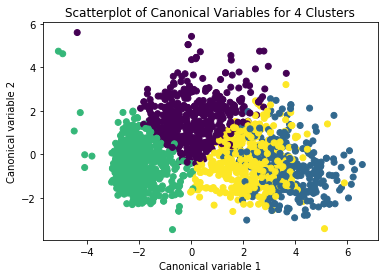

In [91]:
pca_2 = PCA(2)# return 2 first canonical variables
pca = PCA()
plot_columns = pca.fit_transform(X_std)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=y_clusters,) 
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 4 Clusters')
plt.show()

In [92]:
pca.explained_variance_ratio_

array([0.37842071, 0.11604952, 0.0777135 , 0.067138  , 0.05451587,
       0.05253638, 0.04417076, 0.04237809, 0.03243519, 0.02904331,
       0.02766932, 0.02580624, 0.02111675, 0.01659424, 0.01441212])

In [93]:
df_km.columns

Index(['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Year_Custumer'],
      dtype='object')

In [94]:
print(abs(pca.components_ )[0:2,:])

[[0.06425953 0.31600562 0.00757793 0.31630408 0.29900409 0.33899477
  0.30863978 0.29871107 0.24602496 0.03854509 0.23536567 0.34372784
  0.31414881 0.26692549 0.03999036]
 [0.10048191 0.06080976 0.00952249 0.19612931 0.10310553 0.10180593
  0.10779186 0.08548377 0.17484998 0.55613964 0.42309657 0.00663373
  0.14670711 0.42032616 0.43658999]]


In [95]:
pca.components_[0:2, :].shape

(2, 15)

In [96]:
pca.components_[0]

array([-0.06425953,  0.31600562,  0.00757793,  0.31630408,  0.29900409,
        0.33899477,  0.30863978,  0.29871107,  0.24602496, -0.03854509,
        0.23536567,  0.34372784,  0.31414881, -0.26692549, -0.03999036])

In [97]:
plot_columns[:,0:2].shape

(2216, 2)

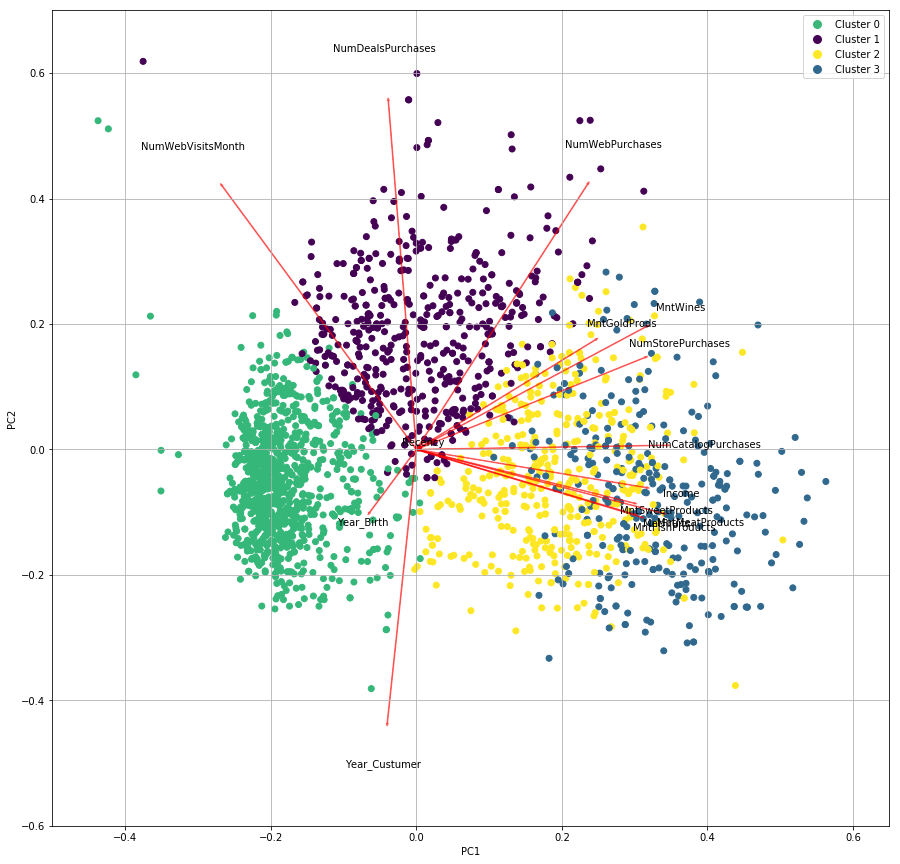

In [98]:
y = y_clusters
labels = df_km.columns
plt.figure(figsize=[15.0,15.0])
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster 0',markerfacecolor='#3CB779', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='Cluster 1',markerfacecolor='#440154', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='Cluster 2',markerfacecolor='#FDE826', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='Cluster 3',markerfacecolor='#31688E', markersize=10)]
    
def myplot(score,coeff,labels=labels):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    plt.legend(handles=legend_elements)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'black', ha = 'center', va = 'center')
plt.xlim(-0.5,0.65)
plt.ylim(-0.6,0.7)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(plot_columns[:,0:2],np.transpose(pca.components_[0:2, :]))

plt.show()

# Predictive Classification

In [99]:
df.head(11)

Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  \
0         1957  58138.0        0         0  2012-09-04       58       635   
1         1954  46344.0        1         1  2014-03-08       38        11   
2         1965  71613.0        0         0  2013-08-21       26       426   
3         1984  26646.0        1         0  2014-02-10       26        11   
4         1981  58293.0        1         0  2014-01-19       94       173   
5         1967  62513.0        0         1  2013-09-09       16       520   
6         1971  55635.0        0         1  2012-11-13       34       235   
7         1985  33454.0        1         0  2013-05-08       32        76   
8         1974  30351.0        1         0  2013-06-06       19        14   
9         1950   5648.0        1         1  2014-03-13       68        28   
11        1976   7500.0        0         0  2012-11-13       59         6   

    MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          88              546              172                88   
1           1                6                2                 1   
2          49              127              111                21   
3           4               20               10                 3   
4          43              118               46                27   
5          42               98                0                42   
6          65              164               50                49   
7          10               56                3                 1   
8           0               24                3                 3   
9           0                6                1                 1   
11         16               11               11                 1   

    MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0             88                  3                8                   10   
1              6                  2                1                    1   
2             42                  1                8                    2   
3              5                  2                2                    0   
4             15                  5                5                    3   
5             14                  2                6                    4   
6             27                  4                7                    3   
7             23                  2                4                    0   
8              2                  1                3                    0   
9             13                  1                1                    0   
11            16                  1                2                    0   

    NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                   4                  7             0             0   
1                   2                  5             0             0   
2                  10                  4             0             0   
3                   4                  6             0             0   
4                   6                  5             0             0   
5                  10                  6             0             0   
6                   7                  6             0             0   
7                   4                  8             0             0   
8                   2                  9             0             0   
9                   0                 20             1             0   
11                  3                  8             0             0   

    AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  2n Cycle  \
0              0             0             0         0         1         0   
1              0             0             0         0         0         0   
2              0             0             0         0         0         0   
3              0             0             0         0         0         0   
4              0             0             0         0         0      

In [100]:
df.tail(11)

Year_Birth    Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  \
2229        1972   24434.0        2         0  2014-05-18        9         3   
2230        1984   11012.0        1         0  2013-03-16       82        24   
2231        1970   44802.0        0         0  2012-08-21       71       853   
2232        1986   26816.0        0         0  2012-08-17       50         5   
2233        1977  666666.0        1         0  2013-06-02       23         9   
2234        1974   34421.0        1         0  2013-07-01       81         3   
2235        1967   61223.0        0         1  2013-06-13       46       709   
2236        1946   64014.0        2         1  2014-06-10       56       406   
2237        1981   56981.0        0         0  2014-01-25       91       908   
2238        1956   69245.0        0         1  2014-01-24        8       428   
2239        1954   52869.0        1         1  2012-10-15       40        84   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
2229          2                8               20                 0   
2230          3               26                7                 1   
2231         10              143               13                10   
2232          1                6                3                 4   
2233         14               18                8                 1   
2234          3                7                6                 2   
2235         43              182               42               118   
2236          0               30                0                 0   
2237         48              217               32                12   
2238         30              214               80                30   
2239          3               61                2                 1   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
2229            17                  2                2                    1   
2230            23                  3                3                    1   
2231            20                  2                9                    4   
2232             3                  1                0                    0   
2233            12                  4                3                    1   
2234             9                  1                1                    0   
2235           247                  2                9                    3   
2236             8                  7                8                    2   
2237            24                  1                2                    3   
2238            61                  2                6                    5   
2239            21                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
2229                  2                  7             0             0   
2230                  2                  9             1             0   
2231                 12                  8             0             0   
2232                  3                  4             0             0   
2233                  3                  6             0             0   
2234                  2                  7             0             0   
2235                  4                  5             0             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  2n Cycle  \
2229             0             0             0         0         0         0   
2230             0             0             0         0         0         0   
2231             0             0             0         0         0         0   
2232             0             0  

In [101]:
df.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', '2n Cycle',
       'Basic', 'Graduation', 'Master', 'PhD', 'Divorced', 'Married', 'Single',
       'Together', 'Widow'],
      dtype='object')

In [102]:
df['Year_Custumer'] = pd.to_datetime(df['Dt_Customer'], yearfirst=True).dt.year

In [103]:
df.drop(columns=['Dt_Customer'], inplace=True)

In [104]:
df.head(11)

Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0         1957  58138.0        0         0       58       635         88   
1         1954  46344.0        1         1       38        11          1   
2         1965  71613.0        0         0       26       426         49   
3         1984  26646.0        1         0       26        11          4   
4         1981  58293.0        1         0       94       173         43   
5         1967  62513.0        0         1       16       520         42   
6         1971  55635.0        0         1       34       235         65   
7         1985  33454.0        1         0       32        76         10   
8         1974  30351.0        1         0       19        14          0   
9         1950   5648.0        1         1       68        28          0   
11        1976   7500.0        0         0       59         6         16   

    MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0               546              172                88            88   
1                 6                2                 1             6   
2               127              111                21            42   
3                20               10                 3             5   
4               118               46                27            15   
5                98                0                42            14   
6               164               50                49            27   
7                56                3                 1            23   
8                24                3                 3             2   
9                 6                1                 1            13   
11               11               11                 1            16   

    NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                   3                8                   10   
1                   2                1                    1   
2                   1                8                    2   
3                   2                2                    0   
4                   5                5                    3   
5                   2                6                    4   
6                   4                7                    3   
7                   2                4                    0   
8                   1                3                    0   
9                   1                1                    0   
11                  1                2                    0   

    NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                   4                  7             0             0   
1                   2                  5             0             0   
2                  10                  4             0             0   
3                   4                  6             0             0   
4                   6                  5             0             0   
5                  10                  6             0             0   
6                   7                  6             0             0   
7                   4                  8             0             0   
8                   2                  9             0             0   
9                   0                 20             1             0   
11                  3                  8             0             0   

    AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  2n Cycle  \
0              0             0             0         0         1         0   
1              0             0             0         0         0         0   
2              0             0             0         0         0         0   
3              0             0             0         0         0         0   
4              0             0             0         0         0         0   
5              0             0             0         0         0         0   
6              0             0             0         0    

In [105]:
df.dtypes

Year_Birth               int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
2n Cycle                 uint8
Basic                    uint8
Graduation               uint8
Master                   uint8
PhD                      uint8
Divorced                 uint8
Married                  uint8
Single                   uint8
Together                 uint8
Widow   

In [106]:
df.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', '2n Cycle', 'Basic',
       'Graduation', 'Master', 'PhD', 'Divorced', 'Married', 'Single',
       'Together', 'Widow', 'Year_Custumer'],
      dtype='object')

In [107]:
boolean_var = ['Kidhome', 'Teenhome','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
               'AcceptedCmp2', 'Complain', '2n Cycle', 'Basic',
               'Graduation', 'Master', 'PhD', 'Divorced', 'Married', 'Single',
               'Together', 'Widow']

In [108]:
target = ['Response']

In [109]:
scalar_var = ['Year_Birth', 'Income','Recency', 'MntWines',
               'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
               'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
               'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',]

In [110]:
df_boolean = df[boolean_var]
df_boolean.head(11)

Kidhome  Teenhome  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0         0         0             0             0             0             0   
1         1         1             0             0             0             0   
2         0         0             0             0             0             0   
3         1         0             0             0             0             0   
4         1         0             0             0             0             0   
5         0         1             0             0             0             0   
6         0         1             0             0             0             0   
7         1         0             0             0             0             0   
8         1         0             0             0             0             0   
9         1         1             1             0             0             0   
11        0         0             0             0             0             0   

    AcceptedCmp2  Complain  2n Cycle  Basic  Graduation  Master  PhD  \
0              0         0         0      0           1       0    0   
1              0         0         0      0           1       0    0   
2              0         0         0      0           1       0    0   
3              0         0         0      0           1       0    0   
4              0         0         0      0           0       0    1   
5              0         0         0      0           0       1    0   
6              0         0         0      0           1       0    0   
7              0         0         0      0           0       0    1   
8              0         0         0      0           0       0    1   
9              0         0         0      0           0       0    1   
11             0         0         0      1           0       0    0   

    Divorced  Married  Single  Together  Widow  
0          0        0       1         0      0  
1          0        0       1         0      0  
2          0        0       0         1      0  
3          0        0       0         1      0  
4          0        1       0         0      0  
5          0        0       0         1      0  
6          1        0       0         0      0  
7          0        1       0         0      0  
8          0        0       0         1      0  
9          0        0       0         1      0  
11         0        1       0         0      0

In [111]:
df.shape

(2216, 34)

In [112]:
y = df[target]
y.head()

Response
0         1
1         0
2         0
3         0
4         0

In [113]:
df_scalar = df[scalar_var]
df_scalar.head(11)

Year_Birth   Income  Recency  MntWines  MntFruits  MntMeatProducts  \
0         1957  58138.0       58       635         88              546   
1         1954  46344.0       38        11          1                6   
2         1965  71613.0       26       426         49              127   
3         1984  26646.0       26        11          4               20   
4         1981  58293.0       94       173         43              118   
5         1967  62513.0       16       520         42               98   
6         1971  55635.0       34       235         65              164   
7         1985  33454.0       32        76         10               56   
8         1974  30351.0       19        14          0               24   
9         1950   5648.0       68        28          0                6   
11        1976   7500.0       59         6         16               11   

    MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0               172                88            88                  3   
1                 2                 1             6                  2   
2               111                21            42                  1   
3                10                 3             5                  2   
4                46                27            15                  5   
5                 0                42            14                  2   
6                50                49            27                  4   
7                 3                 1            23                  2   
8                 3                 3             2                  1   
9                 1                 1            13                  1   
11               11                 1            16                  1   

    NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  
0                 8                   10                  4                  7  
1                 1                    1                  2                  5  
2                 8                    2                 10                  4  
3                 2                    0                  4                  6  
4                 5                    3                  6                  5  
5                 6                    4                 10                  6  
6                 7                    3                  7                  6  
7                 4                    0                  4                  8  
8                 3                    0                  2                  9  
9                 1                    0                  0                 20  
11                2                    0                  3                  8

In [114]:
scaler = MinMaxScaler() 
df_norm = scaler.fit_transform(df_scalar)

/Users/ianca/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.



In [115]:
df_scalar.shape

(2216, 14)

In [116]:
df_norm = pd.DataFrame(df_norm, columns=df_scalar.columns)

In [117]:
df_norm.shape

(2216, 14)

In [118]:
df_boolean.reset_index(drop=True, inplace=True)
df_norm.reset_index(drop=True, inplace=True)

In [119]:
X = pd.concat([df_boolean,df_norm], axis=1)
X.tail(30)

Kidhome  Teenhome  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2186        1         1             0             0             0   
2187        0         1             0             0             0   
2188        0         0             0             0             0   
2189        1         1             0             0             0   
2190        0         0             0             0             0   
2191        0         1             0             0             0   
2192        1         1             0             0             0   
2193        1         0             0             0             0   
2194        0         0             0             0             0   
2195        1         0             0             0             0   
2196        1         0             0             0             0   
2197        0         1             0             0             0   
2198        0         0             0             1             1   
2199        1         0             0             0             0   
2200        1         2             0             0             0   
2201        0         1             1             0             0   
2202        1         1             0             0             0   
2203        1         1             0             0             0   
2204        0         1             0             0             0   
2205        2         0             0             0             0   
2206        1         0             1             0             0   
2207        0         0             0             0             0   
2208        0         0             0             0             0   
2209        1         0             0             0             0   
2210        1         0             0             0             0   
2211        0         1             0             0             0   
2212        2         1             0             0             0   
2213        0         0             0             1             0   
2214        0         1             0             0             0   
2215        1         1             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  2n Cycle  Basic  Graduation  \
2186             0             0         0         0      0           1   
2187             0             0         0         1      0           0   
2188             0             0         0         0      0           1   
2189             0             0         0         0      0           0   
2190             0             0         0         1      0           0   
2191             0             0         0         0      0           1   
2192             0             0         0         0      0           1   
2193             0             0         0         0      0           1   
2194             0             0         0         0      0           0   
2195             0             0         0         0      0           1   
2196             0             0         0         0      0           0   
2197             0             0         0         0      0           1   
2198             0             0         0         0      0           0   
2199             0             0         0         1      0           0   
2200             0             0         0         0      0           0   
2201             0             0         0         0      0           0   
2202             0             0         0         0      0           1   
2203             0             0         0         0      0           1   
2204             0             0         0         0      0           1   
2205             0             0         0         0      0           1   
2206             0             0         0         0      0           1   
2207             0             0         0         0      0           0   
2208             0             0         0         0      0           1   
2209             0             0         0         0      0       

In [120]:
X.to_csv('X.csv')

In [121]:
y.to_csv('y.csv')

Ok, the scalar data is normalized. Let's apply supervised ML techniques. 

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [123]:
# import autosklearn.classification
# cls = autosklearn.classification.AutoSklearnClassifier()
# cls.fit(X_train, y_train)
# predictions = cls.predict(X_test)

In [124]:
X_test

Kidhome  Teenhome  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
948         0         1             0             0             0   
218         1         0             0             0             0   
1080        1         1             0             0             0   
414         1         0             0             1             0   
1633        1         0             0             0             0   
530         0         0             0             1             1   
1784        0         1             0             0             1   
1691        1         0             0             0             0   
981         1         1             0             0             0   
963         0         0             0             0             1   
1223        0         1             0             0             0   
2049        1         0             0             0             0   
1460        0         1             0             0             0   
1476        1         0             0             0             0   
289         1         1             0             0             0   
831         0         0             0             0             0   
1422        1         0             0             0             0   
1429        0         0             0             0             0   
1245        1         1             1             0             0   
1200        0         0             0             0             1   
759         1         1             0             0             0   
1027        0         1             1             0             0   
1403        2         1             0             0             0   
1025        1         0             1             0             0   
925         0         1             0             0             0   
1896        0         1             0             1             0   
1137        0         0             0             0             0   
532         1         0             0             0             0   
548         0         0             0             0             0   
839         0         0             1             0             0   
...       ...       ...           ...           ...           ...   
250         0         2             0             0             0   
413         0         0             0             1             1   
2105        0         0             0             0             0   
1567        0         0             0             0             0   
310         0         1             0             0             0   
1716        0         0             0             0             1   
785         0         0             0             0             0   
425         1         0             0             0             0   
2150        0         1             0             0             0   
812         0         1             0             0             0   
2037        1         1             0             0             0   
1874        0         0             1             0             1   
990         1         0             0             0             0   
1916        2         0             0             0             0   
2136        0         1             0             0             0   
526         1         0             0             0             0   
1749        1         0             0             0             0   
1965        0         0             0             0             1   
182         1         0             0             0             0   
170         1         0             0             0             0   
788         1         1             0             0             0   
1447        1         0             0             0             0   
187         0         0             0             0             0   
619         0         1             0             0             0   
1985        1         0             0             0             0   
158         1         1             0             0             0   
1332

In [125]:
import seaborn as sn

/Users/ianca/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/Users/ianca/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning:

max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.

/Users/ianca/miniconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



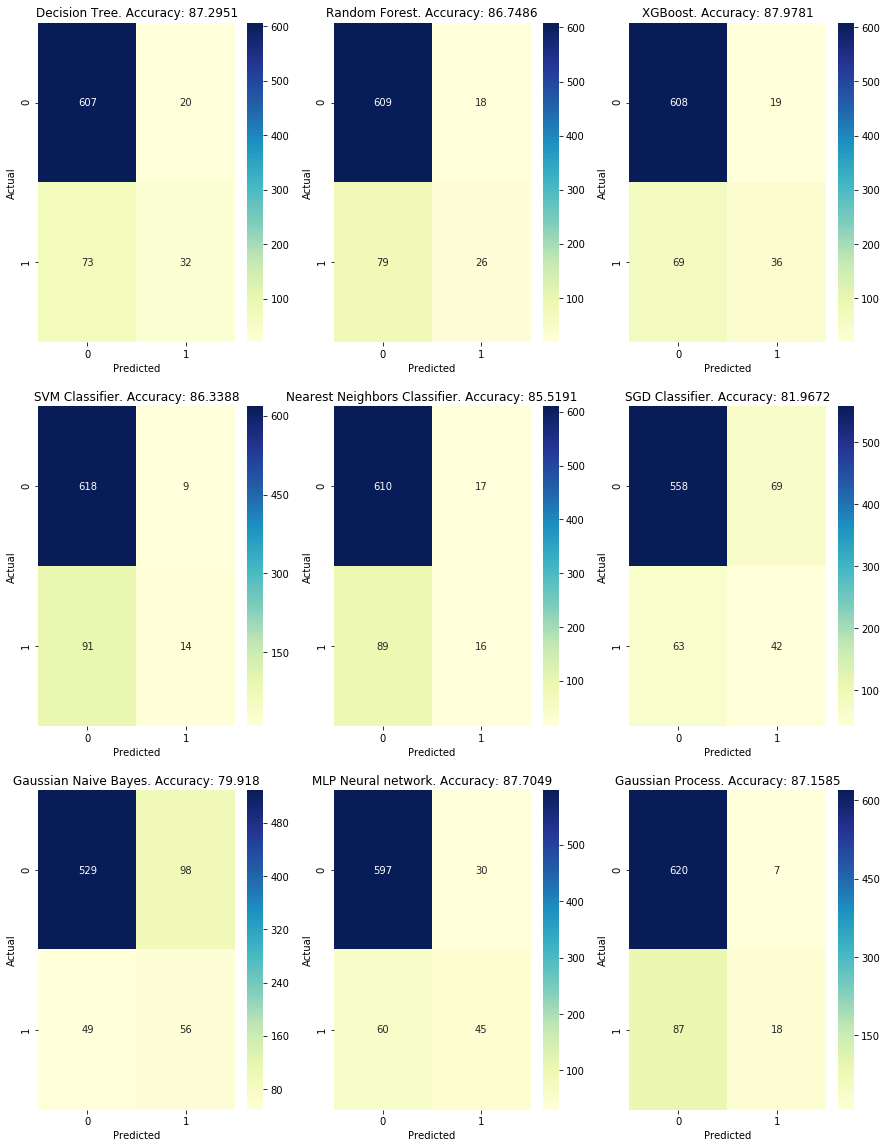

In [126]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(15,20))

def run_model(model, alg_name, plot_index):
    # build the model on training data
    model.fit(X_train, y_train.values.reshape(-1,))

    # make predictions for test data
    y_pred = model.predict(X_test)
    # calculate the accuracy score
    accuracy =  accuracy_score(y_test, y_pred) * 100

    
    data = {'y_Actual':    np.array(y_test['Response']),
            'y_Predicted': y_pred
            }
    df_conf = pd.DataFrame(data)
    confusion_matrix = pd.crosstab(df_conf['y_Actual'], df_conf['y_Predicted'],rownames=['Actual'], colnames=['Predicted'])
    
    ax = fig.add_subplot(3,3,plot_index) 
    ax = sn.heatmap(confusion_matrix, annot=True, fmt="d", cmap="YlGnBu")
    ax.set_title(alg_name + ". Accuracy: " + str(round(accuracy,4)))

from sklearn import tree

model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
run_model(model, "Decision Tree", 1)

# ----- Random Forest ---------------
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10)
run_model(model, "Random Forest", 2)

# ----- xgboost ------------
from xgboost import XGBClassifier

model = XGBClassifier()
run_model(model, "XGBoost", 3)

# ------ SVM Classifier ----------------
from sklearn.svm import SVC

model = SVC()
run_model(model, "SVM Classifier", 4)

# -------- Nearest Neighbors ----------
from sklearn import neighbors

model = neighbors.KNeighborsClassifier()
run_model(model, "Nearest Neighbors Classifier", 5)

# ---------- SGD Classifier -----------------
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier

model = OneVsRestClassifier(SGDClassifier())
run_model(model, "SGD Classifier", 6)

# --------- Gaussian Naive Bayes ---------
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
run_model(model, "Gaussian Naive Bayes", 7)

# ----------- Neural network - Multi-layer Perceptron  ------------
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
run_model(model, "MLP Neural network", 8)

# ----------- Gaussian Process Classifier  ------------
from sklearn.gaussian_process import GaussianProcessClassifier
model = GaussianProcessClassifier()
run_model(model, "Gaussian Process", 9)

We'll go with Gaussian Process because it is important that we have a good accuracy but also the biggest Positive Predictive Value possible.

__Considering__ Cost Contact = 3MU and Revenue = 11MU

We tested our algorithm with 732 people

In [127]:
y_test.shape[0]

732

From this test sample we contacted 25 people and 18 accepted our campaign

In [128]:
(25/732)*2240

76.50273224043717

In [129]:
77*3

231

With this model in hand, we could contact 77 people (from the 2240 people sampled from customer base) having a total cost of 231MU.

In [130]:
(18/732)*2240

55.08196721311475

In [131]:
55*11

605

Still, we would retain 55 people who would generate a revenue of 605MU. 

In this way, the campaign would have a success rate of 71.43% and a profit of 374 MU. 

In [132]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train.values.reshape(-1,))

# make predictions for test data
y_pred = model.predict(X_test)
# calculate the accuracy score
accuracy =  accuracy_score(y_test, y_pred) * 100

In [133]:
model.feature_importances_

array([0.00981051, 0.01279568, 0.02984268, 0.00635302, 0.07794098,
       0.02808858, 0.01478421, 0.00317184, 0.00209092, 0.00110491,
       0.01409775, 0.00930252, 0.01425508, 0.01199545, 0.01028857,
       0.01619024, 0.00872495, 0.00787205, 0.05417044, 0.06726787,
       0.08051977, 0.06024113, 0.04098945, 0.07006262, 0.042933  ,
       0.04791451, 0.05823942, 0.02904363, 0.0366124 , 0.04622997,
       0.03716528, 0.04990058])

In [134]:
pd.DataFrame(data=model.feature_importances_*100, index=X_test.columns)

0
Kidhome              0.981051
Teenhome             1.279568
AcceptedCmp3         2.984268
AcceptedCmp4         0.635302
AcceptedCmp5         7.794098
AcceptedCmp1         2.808858
AcceptedCmp2         1.478421
Complain             0.317184
2n Cycle             0.209092
Basic                0.110491
Graduation           1.409775
Master               0.930252
PhD                  1.425508
Divorced             1.199545
Married              1.028857
Single               1.619024
Together             0.872495
Widow                0.787205
Year_Birth           5.417044
Income               6.726787
Recency              8.051977
MntWines             6.024113
MntFruits            4.098945
MntMeatProducts      7.006262
MntFishProducts      4.293300
MntSweetProducts     4.791451
MntGoldProds         5.823942
NumDealsPurchases    2.904363
NumWebPurchases      3.661240
NumCatalogPurchases  4.622997
NumStorePurchases    3.716528
NumWebVisitsMonth    4.990058